In [1]:
import random
import matplotlib.pyplot as plt

# Rosenbluth walk

In [2]:
# Returns a list of possible next coordinates
def get_candidate_moves(coord, visited):
    candidates = []
    
    for dx, dy in [(0, -1), (0, 1), (-1, 0), (1, 0)]:
        new_coord = (coord[0] + dx, coord[1] + dy)
        if new_coord not in visited:
            candidates.append((dx, dy))
    return candidates


# Returns the coordinates visited in order of when they were visited
# and the moves made to get there
def generate_rosenbluth_walk(L):
    coords = [(0, 0)]
    moves = []
    visited = set(coords)
    w = 1

    while len(coords) <= L:
        candidates = get_candidate_moves(coords[-1], visited)
        w *= len(candidates)
        if len(candidates) == 0: # no possible moves, keep still
            coords += [coords[-1]]*(L+1-len(coords))
            break
        move = random.choice(candidates)
        coords.append((coords[-1][0] + move[0], coords[-1][1] + move[1]))
        moves.append(move)
        visited.add(coords[-1])
    return coords, moves, w


In [3]:
generate_rosenbluth_walk(10)

([(0, 0),
  (0, 1),
  (0, 2),
  (0, 3),
  (1, 3),
  (1, 2),
  (1, 1),
  (1, 0),
  (2, 0),
  (2, -1),
  (2, -2)],
 [(0, 1),
  (0, 1),
  (0, 1),
  (1, 0),
  (0, -1),
  (0, -1),
  (0, -1),
  (1, 0),
  (0, -1),
  (0, -1)],
 23328)

# Estimation

In [4]:
def estimate_c_L(Z):
    W = 0
    for _, _, w in Z:
        W += w
    return W / len(Z)


def ratio_accepted_walks(Z):
    count = 0
    for _, _, w in Z:
        if w > 0:
            count += 1
    return count / len(Z)


In [5]:
n = 500_000
Z = [generate_rosenbluth_walk(10) for _ in range(n)]
print(f"c_L = {estimate_c_L(Z)}")
print(f"Ratio of accepted walks = {ratio_accepted_walks(Z)}")

c_L = 44109.012024
Ratio of accepted walks = 0.990212


In [6]:
n = 500_000
X = range(5, 51, 5)
Y1, Y2 = [], []

for x in X:
    Z = [generate_rosenbluth_walk(x) for _ in range(n)]
    Y1.append(estimate_c_L(Z))
    Y2.append(ratio_accepted_walks(Z))

# Visualisation

Text(0, 0.5, 'c_L')

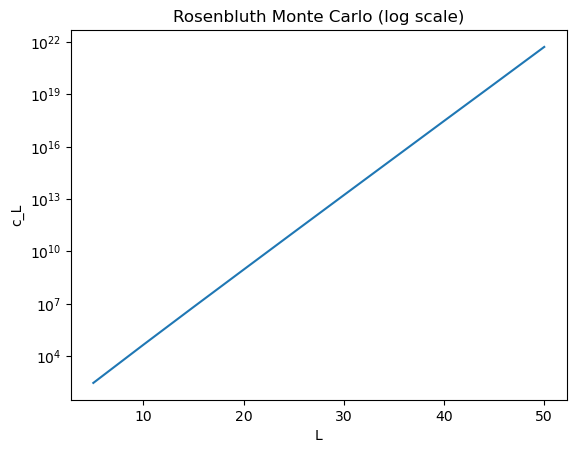

In [7]:
plt.plot(X, Y1)
plt.title("Rosenbluth Monte Carlo (log scale)")
plt.xlabel("L")
plt.yscale("log")
plt.ylabel("c_L")
# plt.savefig("diagrams/rosenbluth1.png")

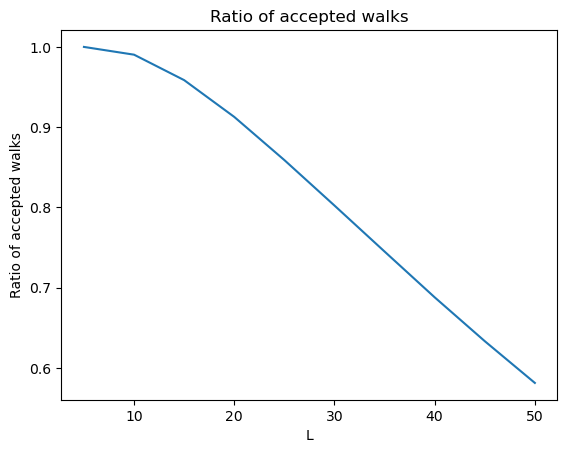

In [8]:
plt.plot(X, Y2)
plt.title("Ratio of accepted walks")
plt.xlabel("L")
plt.ylabel("Ratio of accepted walks")
plt.savefig("diagrams/rosenbluth2.png")